# Public Feedback Classification

Given dataset contains data of feedback give by customers.

It contains a total of seven categories: 'Bug', 'comments', 'complaints', 'meaningless', 'customer', 'student', 'requests'.

In [24]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import time
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
import os

directory = 'dataset/'


dfs = []


for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        
        df = pd.read_csv(file_path, header=None, names=['feedback'], delimiter='\t')
        
        df['label'] = filename.split('.')[0]  # Extract label from filename
        
        dfs.append(df)


df = pd.concat(dfs, ignore_index=True)

In [26]:
df.head()

,feedback,label
0,vA lot of the time my purchase won't show up.,bugs
1,I only see the notification if I catch it live...,bugs
2,When I type the typing area should slide above...,bugs
3,virus in phone.,bugs
4,cant open phone.,bugs


In [27]:
unique_labels = df['label'].unique()
print(unique_labels)

['bugs' 'comments' 'complaints' 'customer' 'meaningless' 'requests'
 'student']


In [28]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FAHIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [30]:
def clean_text(text):
    
    text = re.sub(r'@\S+|#\S+', '', text)
 
    text = re.sub(r'[^\w\s]', '', text)
    
    text = re.sub(r'http\S+', '', text)
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    text = text.lower()
    
    tokens = [ps.stem(token) for token in text.split() if token not in stop_words]
    return ' '.join(tokens)


df['cleaned_feedback'] = df['feedback'].apply(clean_text)

In [31]:
df.head()

,feedback,label,cleaned_feedback
0,vA lot of the time my purchase won't show up.,bugs,va lot time purchas wont show
1,I only see the notification if I catch it live...,bugs,see notif catch live right pop notifi outsid f...
2,When I type the typing area should slide above...,bugs,type type area slide keyboard doesnt
3,virus in phone.,bugs,viru phone
4,cant open phone.,bugs,cant open phone


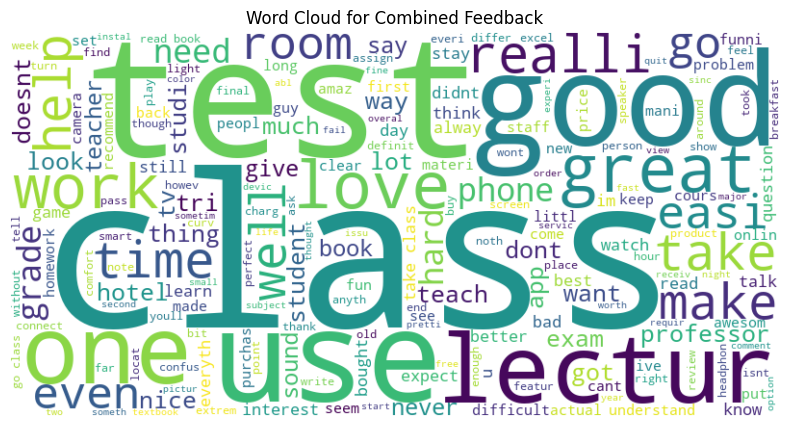

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df['cleaned_feedback'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Combined Feedback')
plt.axis('off')
plt.show()

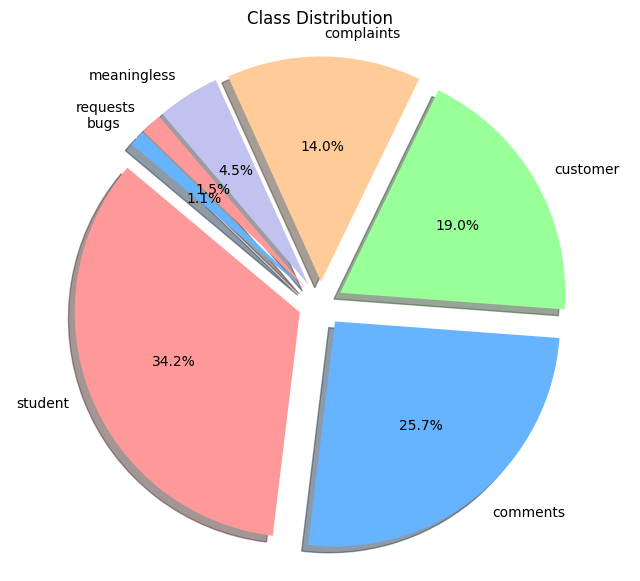

In [33]:

def plot_class_pie_chart(class_counts):
    labels = class_counts.index
    sizes = class_counts.values
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
    explode = (0.1,) * len(labels)

    plt.figure(figsize=(8, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  
    plt.title('Class Distribution')
    plt.show()


class_counts = df['label'].value_counts()


plot_class_pie_chart(class_counts)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_feedback'], df['label'], test_size=0.2, random_state=42)

In [35]:

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [36]:

start_time = time.time()
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_tfidf, y_train)
train_time_log_reg = time.time() - start_time

In [37]:
y_pred_train_log_reg = log_reg_model.predict(X_train_tfidf)
y_pred_test_log_reg = log_reg_model.predict(X_test_tfidf)

train_accuracy_log_reg = accuracy_score(y_train, y_pred_train_log_reg)
test_accuracy_log_reg = accuracy_score(y_test, y_pred_test_log_reg)

f1_log_reg = f1_score(y_test, y_pred_test_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_test_log_reg, average='weighted')
precision_log_reg = precision_score(y_test, y_pred_test_log_reg, average='weighted')

print("Logistic Regression:")
print(f"Training Accuracy: {train_accuracy_log_reg}")
print(f"Testing Accuracy: {test_accuracy_log_reg}")
print(f"F1 Score: {f1_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Training Time: {train_time_log_reg}\n")

Logistic Regression:
Training Accuracy: 0.8865092440051254
Testing Accuracy: 0.7906295754026355
F1 Score: 0.7643793825168516
Recall: 0.7906295754026355
Precision: 0.7465348402254662
Training Time: 2.3181746006011963



c:\Users\FAHIZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:

start_time = time.time()
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
train_time_rf = time.time() - start_time

In [39]:
y_pred_train_rf = rf_model.predict(X_train_tfidf)
y_pred_test_rf = rf_model.predict(X_test_tfidf)

train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

f1_rf = f1_score(y_test, y_pred_test_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_test_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_test_rf, average='weighted')

print("Random Forest:")
print(f"Training Accuracy: {train_accuracy_rf}")
print(f"Testing Accuracy: {test_accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")
print(f"Training Time: {train_time_rf}\n")

Random Forest:
Training Accuracy: 0.9774848984074684
Testing Accuracy: 0.7642752562225475
F1 Score: 0.7574282877634413
Recall: 0.7642752562225475
Precision: 0.7586351538193472
Training Time: 16.97382664680481



In [40]:

start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
train_time_svm = time.time() - start_time

In [41]:
y_pred_train_svm = svm_model.predict(X_train_tfidf)
y_pred_test_svm = svm_model.predict(X_test_tfidf)

train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

f1_svm = f1_score(y_test, y_pred_test_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_test_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_test_svm, average='weighted')

print("Support Vector Machine:")
print(f"Training Accuracy: {train_accuracy_svm}")
print(f"Testing Accuracy: {test_accuracy_svm}")
print(f"F1 Score: {f1_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")
print(f"Training Time: {train_time_svm}\n")

Support Vector Machine:
Training Accuracy: 0.9432546220025627
Testing Accuracy: 0.7745241581259151
F1 Score: 0.75446438288285
Recall: 0.7745241581259151
Precision: 0.7590553472355538
Training Time: 4.953404426574707



c:\Users\FAHIZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:

start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
train_time_nb = time.time() - start_time

In [43]:
y_pred_train_nb = nb_model.predict(X_train_tfidf)
y_pred_test_nb = nb_model.predict(X_test_tfidf)

train_accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)

f1_nb = f1_score(y_test, y_pred_test_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_test_nb, average='weighted')
precision_nb = precision_score(y_test, y_pred_test_nb, average='weighted')

print("Multinomial Naive Bayes:")
print(f"Training Accuracy: {train_accuracy_nb}")
print(f"Testing Accuracy: {test_accuracy_nb}")
print(f"F1 Score: {f1_nb}")
print(f"Recall: {recall_nb}")
print(f"Precision: {precision_nb}")
print(f"Training Time: {train_time_nb}\n")

Multinomial Naive Bayes:
Training Accuracy: 0.789492952590152
Testing Accuracy: 0.7232796486090776
F1 Score: 0.664069367453315
Recall: 0.7232796486090776
Precision: 0.6642154667720983
Training Time: 0.02700328826904297



c:\Users\FAHIZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
from joblib import dump, load


dump(rf_model, 'model.joblib')

['model.joblib']

In [45]:
from joblib import dump, load


dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [46]:
from joblib import load
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


loaded_model = load('model.joblib')


tfidf_vectorizer = load('tfidf_vectorizer.joblib')


def clean_text(text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    
    text = re.sub(r'@\S+|#\S+|http\S+|[^\w\s]', '', text)
   
    text = text.lower()
    
    tokens = [ps.stem(token) for token in text.split() if token not in stop_words]
    return ' '.join(tokens)


new_text = "politicians are corrupted."


cleaned_text = clean_text(new_text)


new_text_tfidf = tfidf_vectorizer.transform([cleaned_text])


single_prediction = loaded_model.predict(new_text_tfidf)[0]
print("Predicted Label:", single_prediction)

Predicted Label: complaints
